In [685]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from cvxopt import matrix,solvers
sigma=5

In [686]:
def kernel_poly(x,y,d):
    return math.pow(np.dot(x.T,y),d)

In [687]:
def kernel_gaus(x,y):
    return np.exp(-1*np.sqrt(np.sum((x-y)**2))/(2*sigma))

In [688]:
N=100
inp_x=np.random.rand(N,2)
df=pd.DataFrame(inp_x,columns=['x1','x2'])
df['d']=df.apply(lambda row: 1 if (row[1]<((1/5)*np.sin(10*row[0])+0.3)) or
                 ((row[1]-0.8)**2+(row[0]-0.5)**2<0.15**2) else -1,axis=1)

In [689]:
df1=df[df['d']==1]
df_1=df[df['d']==-1]

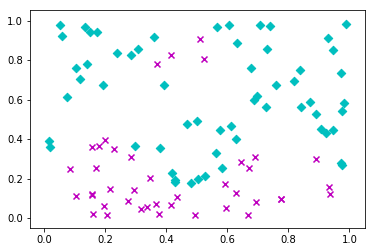

In [690]:
plt.scatter(df1['x1'],df1['x2'],marker='x',c='m')
plt.scatter(df_1['x1'],df_1['x2'],marker='D',c='c')
plt.show()

In [691]:
np.expand_dims(df.loc[0][0:2],axis=1).shape

(2, 1)

In [692]:
df.loc[0][0:2]

x1    0.972743
x2    0.732385
Name: 0, dtype: float64

In [693]:
K=np.zeros((N,N))
for i in range(N):
    for j in range(N):
        K[i][j]=kernel_gaus(np.expand_dims(df.loc[i][0:2],axis=1),
                                                            np.expand_dims(df.loc[j][0:2],axis=1))

In [694]:
M=np.zeros((N,N))
for i in range(N):
    for j in range(N):
        M[i][j]=(df.loc[i]['d']*df.loc[j]['d'])*K[i][j]

In [695]:
M[0][1]

-0.94492925174572073

In [696]:
M[1][0]

-0.94492925174572073

In [697]:
P=matrix(M)

In [698]:
Q=-1*matrix(np.ones((N,1)).astype(float))

In [699]:
np.ones((N,1)).shape

(100, 1)

In [700]:
G=np.zeros((N,N))

In [701]:
np.fill_diagonal(G,-1)

In [702]:
G=matrix(G.astype(float))

In [703]:
H=matrix(np.zeros((N,1)).astype(float))

In [704]:
np.expand_dims(df['d'].values,axis=0).shape

(1, 100)

In [705]:
df['d'].values.astype(float)

array([-1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
       -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,
        1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1.,  1., -1., -1., -1., -1.,  1.])

In [706]:
A=matrix(((df['d'].values).astype(float)),(1,N))

In [707]:
b=matrix(0.0)

In [708]:
sol=solvers.qp(P,Q,G,H,A,b)

     pcost       dcost       gap    pres   dres
 0: -6.2528e+01 -1.8477e+02  1e+02  2e-16  3e+00
 1: -1.1144e+02 -1.4991e+02  4e+01  6e-15  1e+00
 2: -3.4356e+02 -4.1372e+02  7e+01  9e-15  9e-01
 3: -8.7445e+02 -1.1411e+03  3e+02  7e-14  8e-01
 4: -1.3428e+03 -1.5558e+03  2e+02  2e-13  5e-02
 5: -1.3538e+03 -1.3715e+03  2e+01  2e-13  3e-03
 6: -1.3570e+03 -1.3583e+03  1e+00  9e-14  2e-04
 7: -1.3573e+03 -1.3573e+03  4e-02  2e-13  4e-06
 8: -1.3573e+03 -1.3573e+03  2e-03  1e-13  4e-08
 9: -1.3573e+03 -1.3573e+03  1e-04  1e-13  8e-10
Optimal solution found.


In [709]:
sol=pd.Series(sol['x'])

In [710]:
print(len(sol[sol>100]))

9


In [711]:
sol[sol>100]

9     141.340104
12    147.363156
24    124.280995
58    120.803858
60    141.194273
75    169.118468
78    141.667006
94    117.074222
96    212.757464
dtype: float64

In [712]:
df.loc[9]

x1    0.776679
x2    0.094125
d     1.000000
Name: 19, dtype: float64

In [718]:
theta=df.loc[9]['d']-np.sum(K[:,9]*sol*df['d'].values)

In [714]:
df['d'].values

array([-1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,
        1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,
        1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,
        1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,
       -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1], dtype=int64)

In [717]:
(K[:,9]*sol*df['d'].values).shape

(100,)

In [731]:
df=df.reset_index()
df.head()


ValueError: cannot insert level_0, already exists

In [735]:
i=df.loc[0]['index']
K[:,int(i)].shape

(100,)

In [736]:
df['y']=df.apply(lambda row: 1 if (np.sum(K[:,int(row['index'])]*sol*df['d'].values)+theta)>0 else -1,axis=1)

In [744]:
len(df[df.d!=df.y])

0

In [724]:
df.loc[1]['index']

1.0

In [726]:
K[0,1]

0.94492925174572073

In [745]:
df=df.drop('level_0',axis=1)

(100,)

In [ ]:
x1=np.linspace(0,1,100)
x2=np.linspace(0,1,100)
for el1 in x1:
    for el2 in x2:
        tmp=0
        for k in range(100):
            tmp=tmp+sol[k]*df['d'][k]*kernel_gaus(np.array([[el1],[el2]]),
                                                  np.expand_dims(df.loc[k][1:3],axis=1))
        #print(tmp+theta)    
        if (abs(tmp+theta)<1e-1):
            plt.scatter(el1,el2,c='b')
plt.show()            

In [759]:
plt.show()